# CNN
In this section we attempt to model a convolutional neural network without regularisation method. This model gets overfit to the train data such that it does not perform well on test data.

# Setup

In [ ]:
from tensorflow import keras
from keras import datasets, layers, losses
import numpy as np
import matplotlib.pyplot as pyplot

# Loading and normalising the data

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.cifar10.load_data()
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

# Defining the classes

In [ ]:
classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Creating the model based on the given architecture

In [ ]:
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
  layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
  layers.MaxPool2D((2, 2)),

  layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
  layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
  layers.MaxPool2D((2, 2)),

  layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
  layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
  layers.MaxPool2D((2, 2)),

  layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
  layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
  layers.MaxPool2D((2, 2)),

  layers.Flatten(),
  layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
  layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
  layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
  layers.Dense(10, kernel_initializer='he_uniform', activation='softmax'),
  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Compiling the model using the 'adam' optimisation method

In [ ]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Training the model

In [ ]:
history = model.fit(train_imgs, train_labels, batch_size=50, epochs=25, validation_data=(test_imgs, test_labels))

Epoch 1/25
1000/1000 [==============================] - 36s 25ms/step - loss: 1.6046 - accuracy: 0.4060 - val_loss: 1.3491 - val_accuracy: 0.5042
Epoch 2/25
1000/1000 [==============================] - 26s 26ms/step - loss: 1.0842 - accuracy: 0.6146 - val_loss: 1.0324 - val_accuracy: 0.6364
Epoch 3/25
1000/1000 [==============================] - 25s 25ms/step - loss: 0.8392 - accuracy: 0.7048 - val_loss: 0.8429 - val_accuracy: 0.7082
Epoch 4/25
1000/1000 [==============================] - 24s 24ms/step - loss: 0.6872 - accuracy: 0.7624 - val_loss: 0.7506 - val_accuracy: 0.7439
Epoch 5/25
1000/1000 [==============================] - 24s 24ms/step - loss: 0.5747 - accuracy: 0.8021 - val_loss: 0.7747 - val_accuracy: 0.7457
Epoch 6/25
1000/1000 [==============================] - 25s 25ms/step - loss: 0.4973 - accuracy: 0.8279 - val_loss: 0.7411 - val_accuracy: 0.7538
Epoch 7/25
1000/1000 [==============================] - 24s 24ms/step - loss: 0.4275 - accuracy: 0.8513 - val_loss: 0.7706 -

# The accuracy of the model
The results illustrate that the model has depended too much on the training data that it fails to predict the correct classes while encountering the test data 

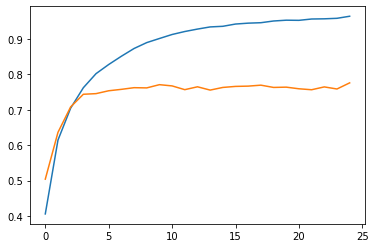

In [ ]:
pyplot.plot(history.history['accuracy'], label='Accuary')
pyplot.plot(history.history['val_accuracy'], label='Validation Accuracy')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 1.1123 - accuracy: 0.7761
